In [11]:
from keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, UpSampling2D, Reshape
from keras.models import Model

In [12]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256)(x)
output_img = Dense(7)(x)
model1 = Model(input_img, output_img)
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
global_average_pooling2d_3 ( (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               8448      
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 1799      
Total para

In [28]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = GlobalAveragePooling2D()(x)

x = Dense(4*4*32, activation='relu')(encoded)
x = Reshape((4, 4, 32))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 4, 4, 64)          0         
__________

In [22]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
# 平均0、標準偏差1の正規分布
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0., scale=1., size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0., scale=1., size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

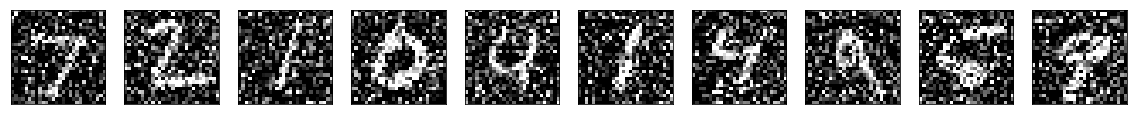

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [29]:
autoencoder.fit(x_train_noisy, x_train, epochs=30, batch_size=256,
                shuffle=True, validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.2799 - val_loss: 0.2547
Epoch 2/30
60000/60000 [==============================] - 3s 50us/step - loss: 0.2372 - val_loss: 0.2137
Epoch 3/30
60000/60000 [==============================] - 3s 50us/step - loss: 0.1899 - val_loss: 0.1729
Epoch 4/30
60000/60000 [==============================] - 3s 50us/step - loss: 0.1640 - val_loss: 0.1565
Epoch 5/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.1503 - val_loss: 0.1437
Epoch 6/30
60000/60000 [==============================] - 3s 50us/step - loss: 0.1404 - val_loss: 0.1348
Epoch 7/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.1336 - val_loss: 0.1312
Epoch 8/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.1286 - val_loss: 0.1250
Epoch 9/30
60000/60000 [==============================] - 3s 50us/step - loss: 0.1249 - val_loss: 0.1233
Epoch

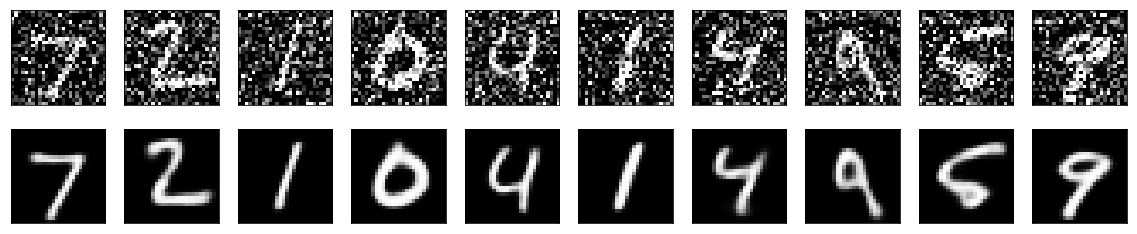

In [30]:
# テスト画像を変換
decoded_imgs = autoencoder.predict(x_test_noisy)
# 何個表示するか
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # オリジナルのテスト画像を表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換された画像を表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [1]:
from keras.layers import Input, Conv2D, AveragePooling2D, UpSampling2D, Reshape, Dense, Activation, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
import keras
from keras.utils import plot_model

Using TensorFlow backend.


In [2]:
def resnet_model(label_num):
    num_filters = 64
    num_blocks = 4
    num_sub_blocks = 2
    input_shape = (128, 128, 3)
    # Start model definition.
    inputs = Input(shape=input_shape)
    x = Conv2D(num_filters, kernel_size=7, padding='same', strides=2, kernel_initializer='he_normal')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Instantiate convolutional base (stack of blocks).
    for i in range(num_blocks):
        for j in range(num_sub_blocks):
            strides = 1
            is_first_layer_but_not_first_block = j == 0 and i > 0
            if is_first_layer_but_not_first_block:
                strides = 2
            y = Conv2D(num_filters, kernel_size=3, padding='same', strides=strides, kernel_initializer='he_normal')(x)
            y = BatchNormalization()(y)
            y = Activation('relu')(y)
            y = Conv2D(num_filters, kernel_size=3, padding='same', kernel_initializer='he_normal')(y)
            y = BatchNormalization()(y)
            if is_first_layer_but_not_first_block:
                x = Conv2D(num_filters, kernel_size=1, padding='same', strides=2, kernel_initializer='he_normal')(x)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)

        num_filters = 2 * num_filters

    # x = AveragePooling2D()(x)
    # y = Flatten()(x)
    y = GlobalAveragePooling2D()(x)
    outputs = Dense(label_num, activation='softmax', kernel_initializer='he_normal')(y)
    model = Model(inputs=inputs, outputs=outputs)

    return model

In [3]:
res_model=resnet_model(2)
plot_model(res_model, to_file='model.png', show_shapes=True)

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [36]:
!pip install pydot